# Regression
### To predict the house prices considering various features

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv(r"C:\Users\amesh\Praju\Prajkta Data Science\Machine learning\House Price Prediction Dataset.csv")

In [15]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [16]:
df=df.iloc[:,1:]                  # id column represents the unique values for each observation, not needed for computation

In [17]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [18]:
df.shape

(2000, 9)

In [19]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [21]:
df[df.duplicated()]                      # here no duplicates present

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


In [22]:
for i in df.columns:
    print(i,df[i].nunique())

Area 1622
Bedrooms 5
Bathrooms 4
Floors 3
YearBuilt 124
Location 4
Condition 4
Garage 2
Price 1999


In [23]:
cat=[]
num=[]         # if unique values are less 10 then consider it as categorical data
for i in df.columns:
    if df[i].nunique()<10:
        print(i,df[i].nunique(), df[i].unique())
        cat.append(i)
    else:
        num.append(i)

Bedrooms 5 [5 2 4 1 3]
Bathrooms 4 [4 2 1 3]
Floors 3 [3 2 1]
Location 4 ['Downtown' 'Suburban' 'Urban' 'Rural']
Condition 4 ['Excellent' 'Good' 'Fair' 'Poor']
Garage 2 ['No' 'Yes']


In [24]:
cat

['Bedrooms', 'Bathrooms', 'Floors', 'Location', 'Condition', 'Garage']

In [25]:
num

['Area', 'YearBuilt', 'Price']

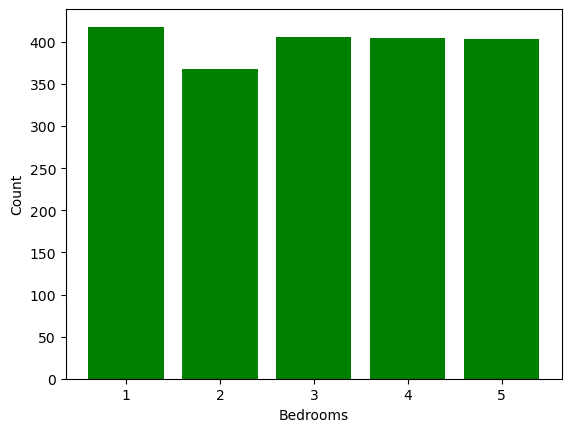

In [26]:
vc=df['Bedrooms'].value_counts()
plt.bar(vc.index, height=vc, color='g')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

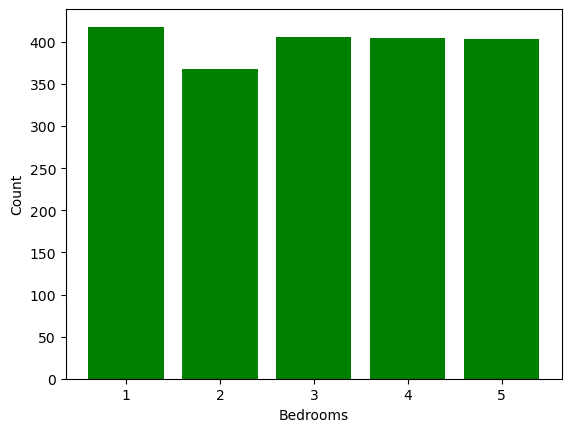

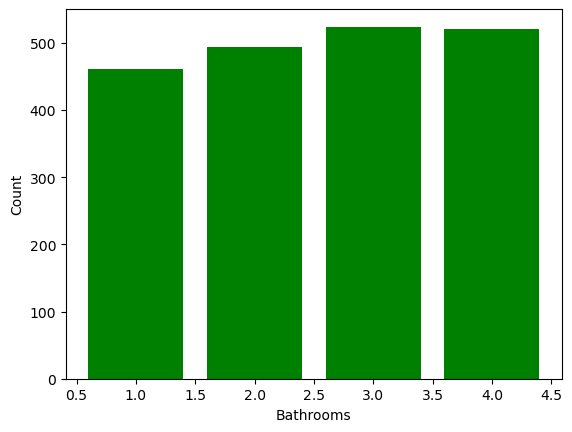

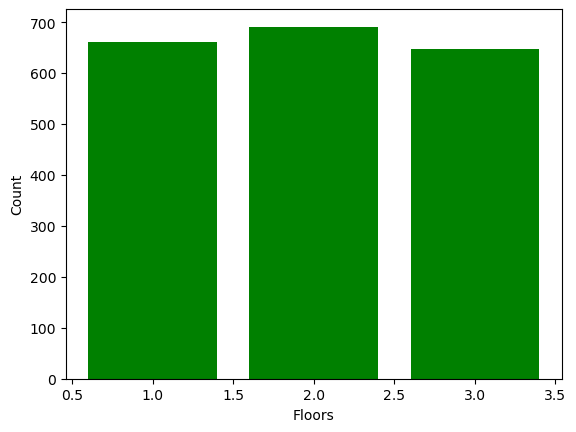

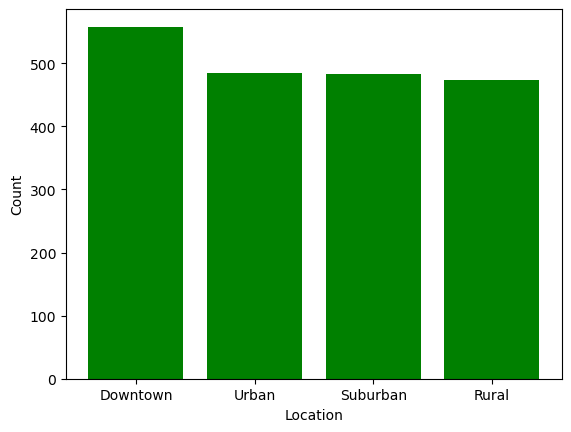

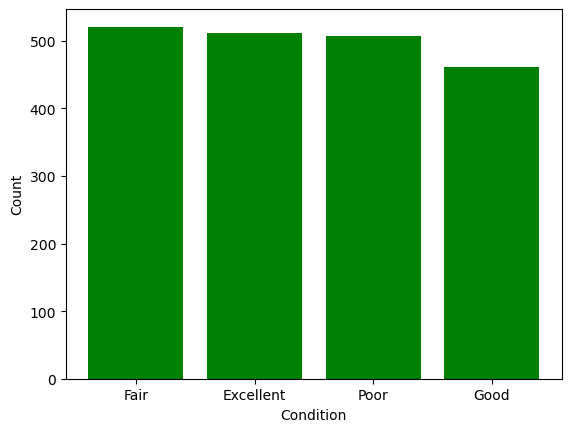

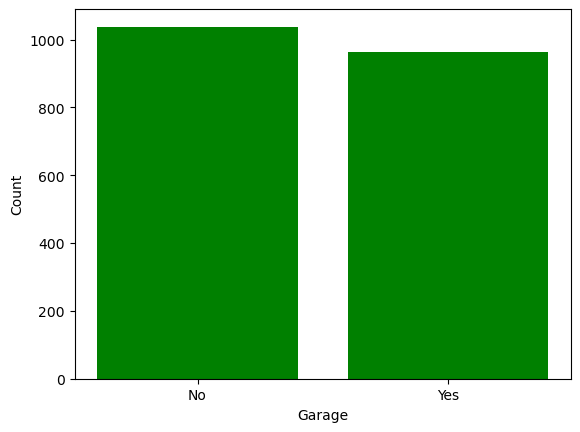

In [27]:
# Categrical column analysis
# ploting all the categorical columns to know whether the all the data in the particular column has almost same count of data,
# means it should be a balanced data
# for eg if we have gender column male and female, and if we have 98 females and 2 males then we need to drop that column
# because machine will get nothing to learn about the Gender column
# univarient analysis
for i in cat:                         
    vc=df[i].value_counts()
    plt.bar(vc.index, height=vc, color='g')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

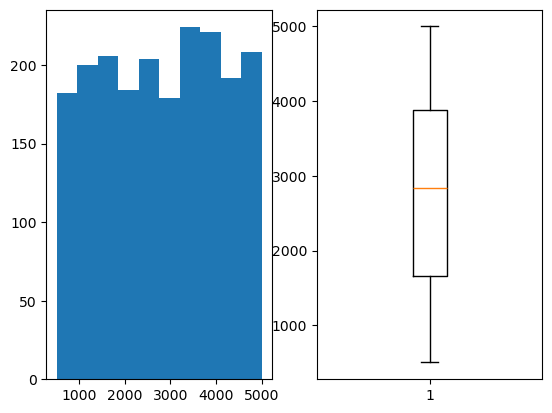

In [28]:
fig, ax=plt.subplots(1,2)
ax[0].hist(df['Area'])
ax[1].boxplot(df['Area'])
plt.show()

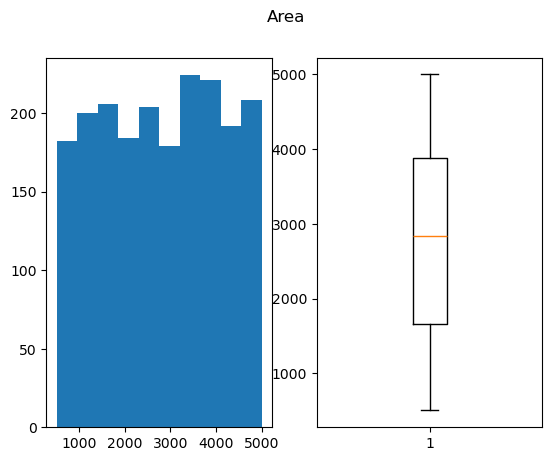

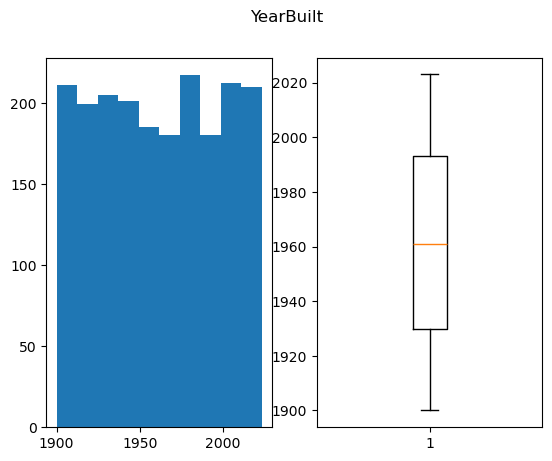

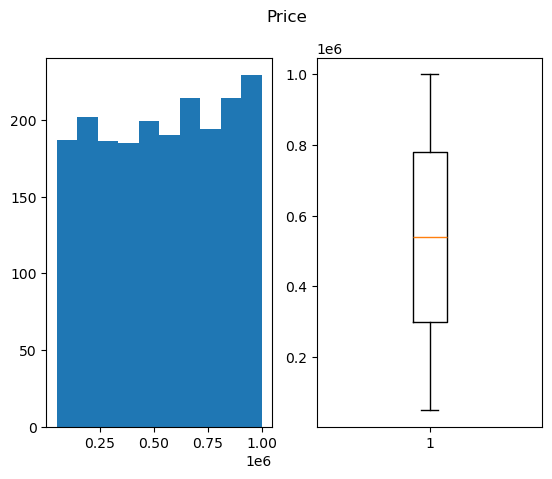

In [29]:
# Numerical columns analysis
# to check for outliers and data should be normally distributed
for i in num:
    fig, ax=plt.subplots(1,2)        # fig means one frame(one row), ax means axis subplots(row,columns) 
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    plt.suptitle(i)                  # suptitle means super title means for one frame(row), a single name for both the graphs
    plt.show()

In [30]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [31]:
# One hot encoding, converting location nominal column to numeric
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)             # if sparse_output=true, then it will give n dimensional array
locations=ohe.fit_transform(df[['Location']])      # applying ohe encoding on 'Location' dataframe
locations

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [32]:
df['Location']

0       Downtown
1       Downtown
2       Downtown
3       Suburban
4       Downtown
          ...   
1995    Suburban
1996    Suburban
1997       Rural
1998       Urban
1999    Suburban
Name: Location, Length: 2000, dtype: object

In [33]:
ohe.categories_                                  # sequence of the location categories in the 'locations' array

[array(['Downtown', 'Rural', 'Suburban', 'Urban'], dtype=object)]

In [34]:
type(locations)

numpy.ndarray

In [35]:
# we need to concatenate the 'locations' array to the 'df' dataframe hence converting the 'locations' array to dataframe
location_df=pd.DataFrame(locations, columns=ohe.categories_) 
location_df=location_df.iloc[:,1:]          # session 4
location_df

,Rural,Suburban,Urban
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1995,0.0,1.0,0.0
1996,0.0,1.0,0.0
1997,1.0,0.0,0.0
1998,0.0,0.0,1.0


In [36]:
df=pd.concat([df,location_df], axis=1) # axis=1, we need to add the columns 'location_df'
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,Good,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,1.0


In [37]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [38]:
# Label encoding for 'Condition' column because the data inside this column is ordinal and 
# updating the df 'Condition' column
df[['Condition']]=df[['Condition']].replace(to_replace=['Excellent', 'Good', 'Fair', 'Poor'], value=[3,2,1,0])

C:\Users\amesh\AppData\Local\Temp\ipykernel_3212\2228850345.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Condition']]=df[['Condition']].replace(to_replace=['Excellent', 'Good', 'Fair', 'Poor'], value=[3,2,1,0])


In [39]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,Yes,161119,0.0,0.0,1.0


In [40]:
df['Garage'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
# Label encoding of 'Garage' column
df[['Garage']]=df[['Garage']].replace(to_replace=df['Garage'].unique(), value=[1,0])

C:\Users\amesh\AppData\Local\Temp\ipykernel_3212\1436659666.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Garage']]=df[['Garage']].replace(to_replace=df['Garage'].unique(), value=[1,0])


In [42]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,1,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,1,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,1,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,0,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,0,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,1,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,0,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,1,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,0,161119,0.0,0.0,1.0


In [43]:
X_df=df.drop(['Location','Price'],axis=1)  # Independent data
Y=df['Price']      # Dependent data
X_df
Y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

In [44]:
# converting X and Y dataframes into numpy arrays for fast computation
X=X_df.values
Y=Y.values

In [45]:
X_df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,3,1,0.0,0.0,0.0
1,4272,5,4,3,1958,3,1,0.0,0.0,0.0
2,3592,2,2,3,1938,2,1,0.0,0.0,0.0
3,966,4,2,2,1902,1,0,0.0,1.0,0.0
4,4926,1,4,2,1975,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,1,0.0,1.0,0.0
1996,3046,5,2,1,2019,0,0,0.0,1.0,0.0
1997,1062,5,1,2,1903,0,1,1.0,0.0,0.0
1998,4062,3,1,2,1936,3,0,0.0,0.0,1.0


In [46]:
Y

array([149919, 424998, 266746, ..., 476925, 161119, 482525], dtype=int64)

In [47]:
# Diving X and Y data for training(80%) and testing(20%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)   # random_state=0 means randomly selecting data for training and testing

In [48]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1600, 10)
(400, 10)
(1600,)
(400,)


# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)                 # model is learning about the relation of X and Y

LinearRegression()

In [50]:
Y_train_pred=lr_model.predict(X_train)       # testing the model on basis of training data

In [51]:
# Performing the test on training data
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_t=mean_squared_error(Y_train_pred,Y_train)
rmse_t=mean_squared_error(Y_train_pred,Y_train)**0.5
mae_t=mean_absolute_error(Y_train_pred,Y_train)
r2_lin_train=r2_score(Y_train,Y_train_pred) 

print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_lin_train)                                     # if r2 score is 1, then perform regularization

77493835068.88966
278377.1453781536
241404.41501856488
0.005990048684153981


In [52]:
# Performing the test on test data
Y_test_pred=lr_model.predict(X_test)           
mse_test=mean_squared_error(Y_test_pred,Y_test)
rmse_test=mean_squared_error(Y_test_pred,Y_test)**0.5
mae_test=mean_absolute_error(Y_test_pred,Y_test)
r2_lin_test=r2_score(Y_test,Y_test_pred) 

print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_lin_test)

69950148039.2596
264480.90297649015
226115.13920729904
-0.0005046830542836389


# Assumptions of Linear Regression

1.Linearity:



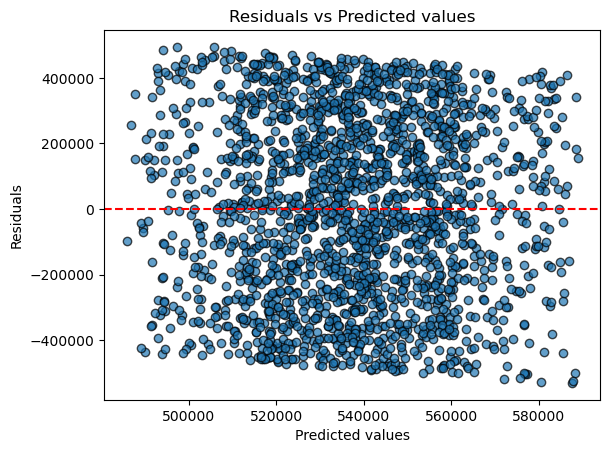

Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.

2.Independence of errors(Durbin-Watson test):

Durbin-Watson statistics: 2.0520005351281703
Residuals appear to be independent(No autocorrelation).

3.Homoscedasticity (Breusch-Pagan test) test:

Lagrange multiplier statistic: 15.078459339348482
p-value: 0.12922744613057793
Residuals have constant variance (Homoscedasticity).

4.Normality of errors:



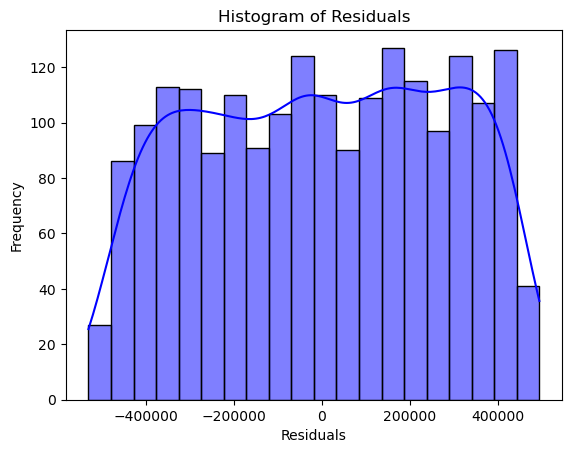

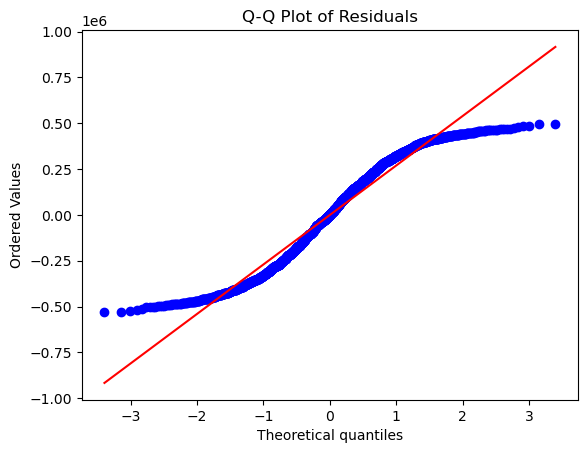

Shapiro-Wilk test p-value: 6.702111000275074e-24
Residuals are not normally distributed. Consider transformation or robust regression.

4.Multicollinarity (Variance Inflation Factor):

       Feature        VIF
0         Area   5.637499
1     Bedrooms   5.462243
2    Bathrooms   6.303486
3       Floors   7.069040
4    YearBuilt  25.988084
5    Condition   2.753289
6       Garage   2.091085
7     (Rural,)   1.852293
8  (Suburban,)   1.866693
9     (Urban,)   1.868663
High multicollinearity detected. Consider removing or combining highly correlated variables.



In [53]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro,probplot

def test_liner_regression_assumptions(X,Y,X_df):
    """
    Tests the key assumptions of linear regression:Linearity, independence(no correlation), homoscedasticity, 
    normality of residuals and no multi-collinearity.

    Parameters:
    X_df(DataFrame) : Independent variables
    Y(series) : Dependent variable

    Returns:
    None
    """
    
# Add constant to X for intercept
X=sm.add_constant(X)

# Fit the OLS model
ols_model=sm.OLS(Y,X).fit()
residuals=ols_model.resid
predicted_values=ols_model.fittedvalues

# 1. Linearity :
print("1.Linearity:\n")
plt.scatter(predicted_values,residuals,alpha=0.7,edgecolors='k')
plt.axhline(y=0,color='red',linestyle='--')                         # horizontal line/prediction line
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted values")
plt.show()
print("Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.\n")

# 2. No autocorrelation(Independence of errors) :
print("2.Independence of errors(Durbin-Watson test):\n")
dw_stat=durbin_watson(residuals)
print(f"Durbin-Watson statistics: {dw_stat}")
if 1.5<=dw_stat<=2.5:
    print("Residuals appear to be independent(No autocorrelation).\n")
else:
    print("Residuals show autocorrelation. Consider adding lag variable or using GLS.\n")

# 3. Homoscedasticity : 
print("3.Homoscedasticity (Breusch-Pagan test) test:\n")
bp_test=het_breuschpagan(residuals,X)
print(f"Lagrange multiplier statistic: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")
if bp_test[1]>0.05:
    print("Residuals have constant variance (Homoscedasticity).\n")
else:
    print("Residuals do not have constant variance (Homoscedasticity). Consider GLS or transformations.\n")

# 4. Normality of errors : 
print("4.Normality of errors:\n")
sns.histplot(residuals,kde=True,bins=20,color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

probplot(residuals,dist="norm",plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

shapiro_test=shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue>0.05:
    print("Residuals are normally distributed.\n")
else:
    print("Residuals are not normally distributed. Consider transformation or robust regression.\n")

# 5. Multicollinarity : 
print("4.Multicollinarity (Variance Inflation Factor):\n")
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_df.columns
vif_data["VIF"]=[variance_inflation_factor(X_df.values,i) for i in range(X_df.shape[1])]
print(vif_data)                                           # Variance of one column with all other independent columns
if vif_data["VIF"].max()>10:
    print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
else:
    print("No significant multicollinearity detected.\n")

In [54]:
test_liner_regression_assumptions(X_train,Y_train,X_df)

# Polynomail regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly=PolynomialFeatures(degree=10)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)

In [57]:
X_train[0].size

10

In [58]:
X_poly_train[0].size

184756

In [59]:
poly_model=LinearRegression()
poly_model.fit(X_poly_train,Y_train)
Y_poly_pred=poly_model.predict(X_poly_train)
Y_poly_pred

array([511935.90338202, 416767.92494269, 182399.07533332, ...,
       277741.78968879, 456950.8613288 , 718385.00681754])

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# On training data
mse_poly_train=mean_squared_error(Y_poly_pred,Y_train)
rmse_poly_train=mean_squared_error(Y_poly_pred,Y_train)**0.5
mae_poly_train=mean_absolute_error(Y_poly_pred,Y_train)
r2_poly_train=r2_score(Y_train,Y_poly_pred)            # goodness of fit of training data, range is 0 to 1
print(mse_poly_train)
print(rmse_poly_train)
print(mae_poly_train)
print(r2_poly_train)

44340489595.97704
210571.81576834313
166680.29495998356
0.43124652605672853


In [61]:
# On testing data
Y_poly_test_pred=poly_model.predict(X_poly_test)           
mse_poly_test=mean_squared_error(Y_poly_test_pred,Y_test)
rmse_poly_test=mean_squared_error(Y_poly_test_pred,Y_test)**0.5
mae_poly_test=mean_absolute_error(Y_poly_test_pred,Y_test)
r2_poly_test=r2_score(Y_test,Y_poly_test_pred)  

print(mse_poly_test)
print(rmse_poly_test)
print(mae_poly_test)
print(r2_poly_test)

1199469897500.0396
1095203.1307022637
543028.0977887103
-16.156150248000728


# Regularization techniques

## 1. Lasso algorithm

In [62]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
# On training data
l1=Lasso(alpha=1.0)                                   # alpha is lamda, to fine tune the error
l1.fit(X_train,Y_train)
Y_pred_train_l1=l1.predict(X_train) 

mse_l1_train=mean_squared_error(Y_pred_train_l1,Y_train)
rmse_l1_train=mean_squared_error(Y_pred_train_l1,Y_train)**0.5
mae_l1_train=mean_absolute_error(Y_pred_train_l1,Y_train)
r2_l1_train=r2_score(Y_train,Y_pred_train_l1)            # goodness of fit of training data, range is 0 to 1
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

77493835091.66805
278377.1454190664
241404.44889964082
0.005990048391976699


In [63]:
# On testing data
l1=Lasso(alpha=1.0)                                   # alpha is lamda, to fine tune the error
l1.fit(X_test,Y_test)
Y_pred_test_l1=l1.predict(X_test) 

mse_l1_test=mean_squared_error(Y_pred_test_l1,Y_test)
rmse_l1_test=mean_squared_error(Y_pred_test_l1,Y_test)**0.5
mae_l1_test=mean_absolute_error(Y_pred_test_l1,Y_test)
r2_l1_test=r2_score(Y_test,Y_pred_test_l1)            # goodness of fit of training data, range is 0 to 1
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

68300008365.38242
261342.70291206223
222357.49291371688
0.023097446715065417


## 2. Ridge algorithm

In [64]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
# On training data
l2=Ridge(alpha=1.0)                                   # alpha is lamda 
l2.fit(X_train,Y_train)
Y_pred_train_l1=l2.predict(X_train) 

mse_l1_train=mean_squared_error(Y_pred_train_l1,Y_train)
rmse_l1_train=mean_squared_error(Y_pred_train_l1,Y_train)**0.5
mae_l1_train=mean_absolute_error(Y_pred_train_l1,Y_train)
r2_l1_train=r2_score(Y_train,Y_pred_train_l1)            # goodness of fit of training data, range is 0 to 1
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

77493836998.93173
278377.1488447493
241405.5710556811
0.0059900239275908485


In [65]:
# On testing data
l2 = Ridge(alpha= 1.0)
l2.fit(X_test, Y_test)
Y_pred_test_l2= l2.predict(X_test)

mse_l2_test =mean_squared_error(Y_pred_test_l2, Y_test)
rmse_l2_test =mean_squared_error(Y_pred_test_l2, Y_test)**0.5
mae_l2_test =mean_absolute_error(Y_pred_test_l2, Y_test)
r2_l2_test =r2_score(Y_test, Y_pred_test_l2)
print(mse_l2_test)
print(rmse_l2_test)
print(mae_l2_test)
print(r2_l2_test)

68300086592.35385
261342.85257560393
222361.4055325707
0.023096327826064522


# 3. ElasticNet algorithm

In [66]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
# On training data
l3=ElasticNet(alpha=1.0, l1_ratio=0.6)                                   # alpha is lamda 
l3.fit(X_train,Y_train)
Y_pred_train_l1=l3.predict(X_train) 

mse_l1_train=mean_squared_error(Y_pred_train_l1,Y_train)
rmse_l1_train=mean_squared_error(Y_pred_train_l1,Y_train)**0.5
mae_l1_train=mean_absolute_error(Y_pred_train_l1,Y_train)
r2_l1_train=r2_score(Y_train,Y_pred_train_l1)            # goodness of fit of training data, range is 0 to 1
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

77617289888.01068
278598.79735564307
241859.75173997655
0.0044064992490912


In [67]:
# On testing data
l3 = ElasticNet(alpha= 1.0, l1_ratio = 0.6)
l3.fit(X_test, Y_test)
Y_pred_test_l3= l3.predict(X_test)

mse_l3_test =mean_squared_error(Y_pred_test_l3, Y_test)
rmse_l3_test =mean_squared_error(Y_pred_test_l3, Y_test)**0.5
mae_l3_test =mean_absolute_error(Y_pred_test_l3, Y_test)
r2_l3_test =r2_score(Y_test, Y_pred_test_l3)
print(mse_l3_test)
print(rmse_l3_test)
print(mae_l3_test)
print(r2_l3_test)

68620138661.83977
261954.45913715567
223178.796137904
0.018518587773789563


# KNN regressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor
# On training data
knn_r=KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_train,Y_train)
Y_train_knn=knn_r.predict(X_train)

mse_knn_train=mean_squared_error(Y_train_knn,Y_train)
rmse_knn_train=mean_squared_error(Y_train_knn,Y_train)**0.5
mae_knn_train=mean_absolute_error(Y_train_knn,Y_train)
r2_knn_train=r2_score(Y_train,Y_train_knn)            # goodness of fit of training data, range is 0 to 1
print(mse_knn_train)
print(rmse_knn_train)
print(mae_knn_train)
print(r2_knn_train)

62241443102.0991
249482.35028173655
208717.44225000002
0.2016317972552757


In [69]:
# On testing data
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_test, Y_test)
Y_test_knn=knn_r.predict(X_test)

mse_knn_test =mean_squared_error(Y_test_knn, Y_test)
rmse_knn_test =mean_squared_error(Y_test_knn, Y_test)**0.5
mae_knn_test =mean_absolute_error(Y_test_knn, Y_test)
r2_knn_test =r2_score(Y_test, Y_test_knn)
print(mse_knn_test)
print(rmse_knn_test)
print(mae_knn_test)
print(r2_knn_test)

54771849353.604904
234033.863689862
197460.7575
0.2165921972449698


# SVR

In [70]:
from sklearn.svm import SVR
# On training data
svr=SVR()
svr.fit(X_train,Y_train)
Y_train_svr=svr.predict(X_train)

mse_svr_train=mean_squared_error(Y_train_svr,Y_train)
rmse_svr_train=mean_squared_error(Y_train_svr,Y_train)**0.5
mae_svr_train=mean_absolute_error(Y_train_svr,Y_train)
r2_svr_train=r2_score(Y_train,Y_train_svr)            # goodness of fit of training data, range is 0 to 1
print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

77976591027.24887
279242.8889466102
242440.25955425578
-0.00020224037005900364


In [71]:
# On testing data
svr = SVR()
svr.fit(X_test, Y_test)
Y_test_svr=svr.predict(X_test)

mse_svr_test =mean_squared_error(Y_test_svr, Y_test)
rmse_svr_test =mean_squared_error(Y_test_svr, Y_test)**0.5
mae_svr_test =mean_absolute_error(Y_test_svr, Y_test)
r2_svr_test =r2_score(Y_test, Y_test_svr)
print(mse_svr_test)
print(rmse_svr_test)
print(mae_svr_test)
print(r2_svr_test)

69993567894.52486
264562.97529043036
225485.44055011633
-0.0011257220334441875


# Decision tree regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
# On training data
dtree=DecisionTreeRegressor(max_depth=3, random_state=0)    # max_depth is the depth of the how much data should be divided,max_depth is more then error is less and vice versa 
dtree.fit(X_train,Y_train)
Y_train_dtree=dtree.predict(X_train)

mse_dtree_train=mean_squared_error(Y_train_dtree,Y_train)
rmse_dtree_train=mean_squared_error(Y_train_dtree,Y_train)**0.5
mae_dtree_train=mean_absolute_error(Y_train_dtree,Y_train)
r2_dtree_train=r2_score(Y_train,Y_train_dtree)            # goodness of fit of training data, range is 0 to 1
print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)

76409611628.01125
276422.885499756
238873.53752098395
0.019897334195640104


In [73]:
# On testing data
dtree=DecisionTreeRegressor(max_depth=3, random_state=0)    # max_depth is the depth of the how much data should be divided,max_depth is more then error is less and vice versa 
dtree.fit(X_test,Y_test)
Y_test_dtree = dtree.predict(X_test)

mse_dtree_test =mean_squared_error(Y_test_dtree, Y_test)
rmse_dtree_test =mean_squared_error(Y_test_dtree, Y_test)**0.5
mae_dtree_test =mean_absolute_error(Y_test_dtree, Y_test)
r2_dtree_test =r2_score(Y_test, Y_test_dtree)
print(mse_dtree_test)
print(rmse_dtree_test)
print(mae_dtree_test)
print(r2_dtree_test)

65690317234.24547
256301.2236300199
216162.88184768907
0.060424146818149116


# Random forest regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
# On training data
forest=RandomForestRegressor(max_depth=20,n_estimators=100, random_state=0)     # n_estimators is no. of trees
forest.fit(X_train,Y_train)
Y_train_forest=forest.predict(X_train)

mse_forest_train=mean_squared_error(Y_train_forest,Y_train)
rmse_forest_train=mean_squared_error(Y_train_forest,Y_train)**0.5
mae_forest_train=mean_absolute_error(Y_train_forest,Y_train)
r2_forest_train=r2_score(Y_train,Y_train_forest)            # goodness of fit of training data, range is 0 to 1
print(mse_forest_train)
print(rmse_forest_train)
print(mae_forest_train)
print(r2_forest_train)

12897968399.826906
113569.22294278016
96679.93187354221
0.834558337062709


In [75]:
# On testing data
forest = RandomForestRegressor(max_depth=20, n_estimators=100 ,random_state=0)
forest.fit(X_test, Y_test)
Y_test_forest=forest.predict(X_test)

mse_forest_test =mean_squared_error(Y_test_forest, Y_test)
rmse_forest_test =mean_squared_error(Y_test_forest, Y_test)**0.5
mae_forest_test =mean_absolute_error(Y_test_forest, Y_test)
r2_forest_test =r2_score(Y_test, Y_test_forest)
print(mse_forest_test)
print(rmse_forest_test)
print(mae_forest_test)
print(r2_forest_test)

10785770381.033829
103854.56360234648
87676.3600163988
0.8457299365468683


## Here Random forest regressor is the best ML model as it gives r2 score of 0.8 for training as well as testing data